![Racoon vs Possum](Images/racoon_and_possum.png)

##### Audience Target: Concerned Civilians

## Imports

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Style

In [2]:
sns.set_style('dark')
sns.set(rc={"axes.facecolor": "gray", "figure.facecolor": "white"})

## Loading Data

In [3]:
data_path='./Data/Health_Animalbites.csv'
df=pd.read_csv(data_path)
df.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


## About the Data
---
[Data Source](https://www.kaggle.com/datasets/rtatman/animal-bites?datasetId=2515&sortBy=voteCount)

The Animal Bites dataset contains information on over 9,000 animal bites near Louisville, Kentucky from the years 1985 to 2017. Features include species and breed of the reported animal, general location of the bite as well as whether the animal was rabid.

##### Data Dictionary
![Data Dictionary](Images/data_dict.png)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9003 entries, 0 to 9002
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bite_date          8686 non-null   object 
 1   SpeciesIDDesc      8885 non-null   object 
 2   BreedIDDesc        3759 non-null   object 
 3   GenderIDDesc       6477 non-null   object 
 4   color              6426 non-null   object 
 5   vaccination_yrs    3738 non-null   float64
 6   vaccination_date   4115 non-null   object 
 7   victim_zip         7165 non-null   object 
 8   AdvIssuedYNDesc    2565 non-null   object 
 9   WhereBittenIDDesc  8387 non-null   object 
 10  quarantine_date    2020 non-null   object 
 11  DispositionIDDesc  1535 non-null   object 
 12  head_sent_date     395 non-null    object 
 13  release_date       1445 non-null   object 
 14  ResultsIDDesc      1543 non-null   object 
dtypes: float64(1), object(14)
memory usage: 1.0+ MB


## Analysis

#### What type of animal is a person most likely to be bitten by?
ANS: The top 3 animals that bite humans are dogs, cats, and bats in that order with dogs having the overwhelming majority. 99.5% of bites are from these 3 species. 

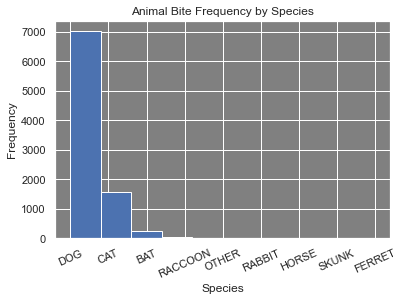

In [5]:
df.SpeciesIDDesc.hist(xrot=24)
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.title('Animal Bite Frequency by Species')
plt.show()

In [6]:
df.SpeciesIDDesc.value_counts()

DOG        7029
CAT        1568
BAT         237
RACCOON      27
OTHER        11
HORSE         5
FERRET        4
RABBIT        3
SKUNK         1
Name: SpeciesIDDesc, dtype: int64

#### What Dog Breed is a Person Most Likely to be Bitten by?
ANs: A person is most likely to be bitten by Pitbulls, German Shepherd, and Labrador Retrievers.

<ipython-input-7-eb18dbdefdcb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Breed_top_10['BreedIDDesc'] = pd.Categorical(Breed_top_10['BreedIDDesc'], Breed_order)


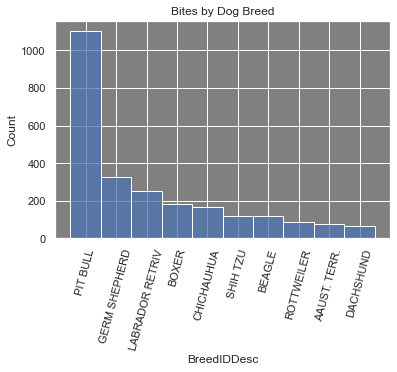

In [7]:
top_10_dog_breed_bites=list(df[df.SpeciesIDDesc=='DOG'].BreedIDDesc.value_counts().head(10).index)

Breed_top_10=df.loc[df.BreedIDDesc.isin(top_10_dog_breed_bites)]
Breed_order=list(Breed_top_10.groupby('BreedIDDesc')['BreedIDDesc'].count().sort_values(ascending=False).index)
Breed_top_10['BreedIDDesc'] = pd.Categorical(Breed_top_10['BreedIDDesc'], Breed_order)
g=sns.histplot(data=Breed_top_10, x="BreedIDDesc")
g.set_xticklabels(labels=Breed_order, rotation=75)
g.set(title='Bites by Dog Breed');

#### Do Male or Female Dogs Bite More?
ANS: Male Dogs are much more likely to bite people than female dogs.

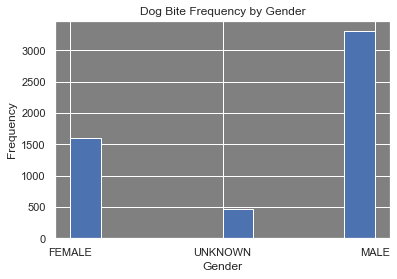

In [8]:
df[df.SpeciesIDDesc=='DOG'].GenderIDDesc.hist()
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Dog Bite Frequency by Gender')
plt.show()

#### When are bites most common?
ANS: The vast majority of bites happened post 2010. This could be an indicator of poor record keeping prior to 2010. More bites appear in the spring and summer months than in the fall and winter months.

In [11]:
df.loc[df['bite_date'] == '5013-07-15 00:00:00', 'bite_date'] = '2013-07-15 00:00:00'

In [12]:
df['bite_date']=pd.to_datetime(df.bite_date)

In [13]:
df['bite_year']= df['bite_date'].dt.year
df['bite_month']=df['bite_date'].dt.month

In [17]:
df['bite_year'].value_counts()

2012.0    1180
2014.0    1176
2011.0    1148
2013.0    1146
2010.0    1131
2016.0    1051
2015.0     985
2017.0     801
2009.0      14
1992.0      10
1994.0       7
1993.0       6
1990.0       6
1991.0       5
1989.0       2
1988.0       1
1985.0       1
1986.0       1
1987.0       1
2007.0       1
1999.0       1
2001.0       1
2002.0       1
1995.0       1
Name: bite_year, dtype: int64

Some of the years look like mistakes. We can drop the following years as they dont have many counts:
2201, 2101, 1952, 2020, 2021, 2018

In [16]:
df.drop(df[df['bite_year'].isin([2201, 2101, 1952, 2020, 2021, 2018])].index, inplace = True)

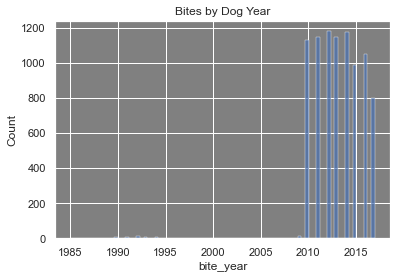

In [40]:
g=sns.histplot(data=df, x='bite_year')
g.set(title='Bites by Year');

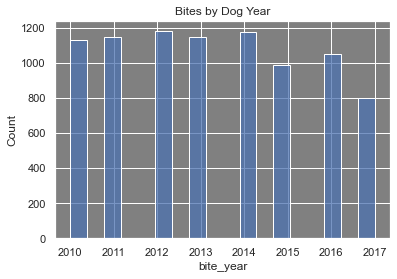

In [41]:
g=sns.histplot(data=df[df.bite_year>=2010], x='bite_year')
g.set(title='Bites by Year');

In [48]:
lambda x : np.arange(1,13)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

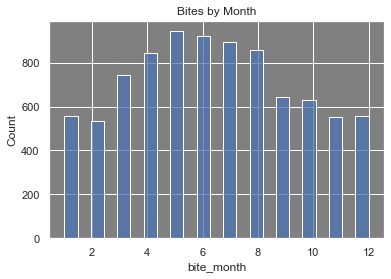

In [53]:
g=sns.histplot(data=df, x='bite_month')
#g.set_xticklabels(labels=['01','02','03','04','05','06','07','08','09','10','11','12'])
g.set(title='Bites by Month');

#### Where are People Bitten the Most?
ANS: The body is almost 6 times as likely to be bitten that the head. 

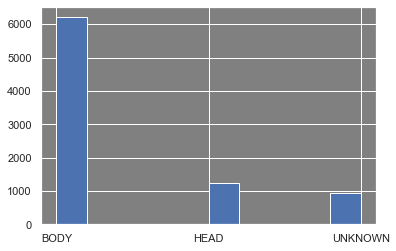

In [61]:
df.WhereBittenIDDesc.hist();

## Conclusions

• Dogs, cats, and bats made up 99.5% of all recorded bites. While dogs and cats are common domestic animals, bats are not. As bats are of nocturnal nature, windows should be kept shut or have effective netting to prevent home intrusion especially during spring and summer months when bites are most common.
• Pitbulls are the dog breed that have most frequently bitten humans. 
• Male dogs bite more frequently than female dogs
• The body was bitten 6x more frequntly than the head

## Future Research

• Where house pets spayed or nuetered? Hormones could affect aggressiveness in animals.
• Dog breed demographics. Are there an abundance of pitbull pets compared to other breeds? This could explain the large number of pitbull bites
• More complete recorded history of bites. There are very few bites in the years prior to 2010